In [1]:
# !gdown 18eLwWy0rmK4BQJxL1bJkxcItKrl1jL6v

In [16]:
# ! pip install tabulate

In [24]:
from langchain_experimental.agents.agent_toolkits import create_csv_agent 
# ! pip install langchain_experimental
# ! pip install pandas
# ! pip install tabulate
from langchain.agents.agent_types import AgentType
from langchain_openai import AzureChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()

True

In [36]:
llm = AzureChatOpenAI(
    api_key = os.getenv("AZURE_OPENAI_API_KEY"),
    azure_endpoint = os.getenv("AZURE_BASE_URL"),
    temperature = 0.5,
    api_version = "2023-03-15-preview",
    model = "gpt-35-turbo"
)

In [43]:
agent_executer = create_csv_agent(
    llm,
    "Bank-Records.csv",
    verbose = True,
    allow_dangerous_code = True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    max_iterations = 5
)

In [38]:
agent_executer.invoke(
    "how many people have credit score more than 500"
)



> Entering new AgentExecutor chain...
Thought: We need to filter the dataframe by the condition that CreditScore is greater than 500 and then count the number of rows.
Action: python_repl_ast
Action Input: len(df[df['CreditScore'] > 500])9357This is the final answer. 
Final Answer: 9357

> Finished chain.


{'input': 'how many people have credit score more than 500', 'output': '9357'}

In [39]:
agent_executer.invoke(
    "give me the credit score at gender level"
)



> Entering new AgentExecutor chain...
Thought: We need to group the data by gender and then select the credit score column
Action: python_repl_ast
Action Input: df.groupby('Gender')['CreditScore'].mean()Gender
Female    650.831389
Male      650.276892
Name: CreditScore, dtype: float64We have the average credit score for each gender, but the question asks for the credit score at gender level, so we need to pivot the data
Action: python_repl_ast
Action Input: df.pivot_table(index='Gender', values='CreditScore', aggfunc='mean')        CreditScore
Gender             
Female   650.831389
Male     650.276892

> Finished chain.


{'input': 'give me the credit score at gender level',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [40]:
agent_executer.run("how many people have credit score >500 in Spain")



> Entering new AgentExecutor chain...
Thought: We need to filter the dataframe to only include rows where the `CreditScore` is greater than 500 and the `Geography` is Spain, and then count the number of rows.
Action: python_repl_ast
Action Input:
```
len(df[(df['CreditScore'] > 500) & (df['Geography'] == 'Spain')])
```2339We have our answer, which is 2339.
Final Answer: 2339

> Finished chain.


'2339'

In [41]:
agent_executer.run("give details about the person with highest balance")



> Entering new AgentExecutor chain...
Thought: We need to find the row with the highest balance value.
Action: python_repl_ast
Action Input: df.loc[df['Balance'].idxmax()]RowNumber                  2093
CustomerId             15757408
Surname                      Lo
CreditScore                 655
Geography                 Spain
Gender                     Male
Age                          38
Tenure                        3
Balance               250898.09
NumOfProducts                 3
HasCrCard                     0
IsActiveMember                1
EstimatedSalary         81054.0
Exited                        1
Complain                      1
Satisfaction Score            1
Card Type                SILVER
Point Earned                336
Name: 2092, dtype: objectWe only need the details of the person with highest balance.
Action: python_repl_ast
Action Input: df.loc[df['Balance'].idxmax()][['RowNumber', 'CustomerId', 'Surname', 'Balance']]RowNumber          2093
CustomerId     1575740

'Agent stopped due to iteration limit or time limit.'

In [46]:
query = "draw a bar plot for which card type has the most exits"
agent_executer.invoke(query)



> Entering new AgentExecutor chain...
Thought: We need to group the data by card type and then count the number of exits for each card type. Then we can plot a bar chart to visualize the result.
Action: python_repl_ast
Action Input:
```
import matplotlib.pyplot as plt

exits_by_card_type = df.groupby('Card Type')['Exited'].sum()
exits_by_card_type.plot(kind='bar')
plt.show()
```ModuleNotFoundError: No module named 'matplotlib'We need to install the matplotlib module before we can use it.
Action: python_repl_ast
Action Input:
```
!pip install matplotlib
```SyntaxError: invalid syntax (<unknown>, line 1)I forgot to put a '!' before the pip command. I will fix that and try again.
Action: python_repl_ast
Action Input:
```
!pip install matplotlib
```SyntaxError: invalid syntax (<unknown>, line 1)I am not in Jupyter notebook, so I cannot use the '!' command. I will install matplotlib using the command line.
Action: python_repl_ast
Action Input:
```
# Exit the Python shell by typing 'exit()

{'input': 'draw a bar plot for which card type has the most exits',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [48]:
# ! pip install matplotlib



> Entering new AgentExecutor chain...
Thought: We need to group the dataframe by card type, then calculate the sum of exits for each group, and finally plot a bar plot.
Action: python_repl_ast
Action Input:
```
import matplotlib.pyplot as plt

exits_by_card_type = df.groupby('Card Type')['Exited'].sum()
exits_by_card_type.plot(kind='bar')
plt.show()
```

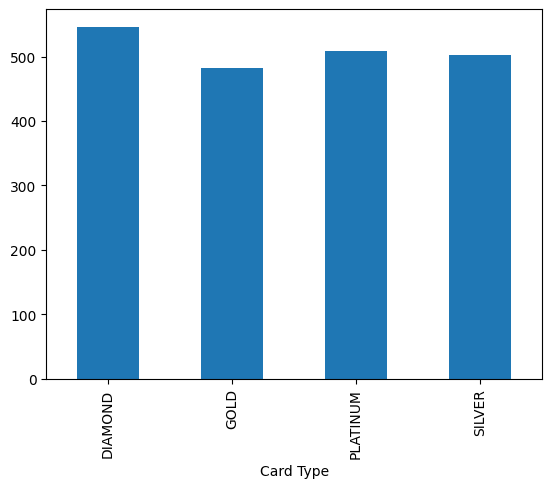

The bar plot should now be displayed. We can visually determine which card type has the most exits.
Final Answer: A bar plot has been displayed showing which card type has the most exits.

> Finished chain.


'A bar plot has been displayed showing which card type has the most exits.'

In [49]:
agent_executer.run("draw a bar plot for which card type has the most exits")



> Entering new AgentExecutor chain...


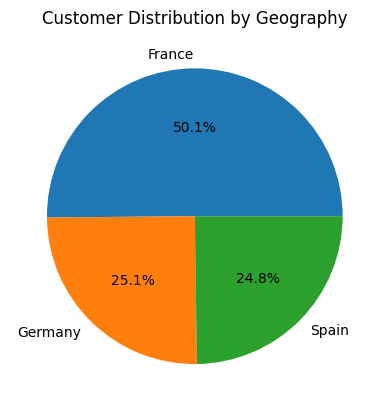

Thought: We need to group the data by Geography, count the number of customers in each group, calculate the percentage of each group, and then plot a pie chart.
Action: python_repl_ast
Action Input:
```
import matplotlib.pyplot as plt

geo_counts = df.groupby('Geography').size()
geo_perc = geo_counts / geo_counts.sum() * 100
plt.pie(geo_perc, labels=geo_perc.index, autopct='%1.1f%%')
plt.title('Customer Distribution by Geography')
plt.show()
```The pie chart shows the percentage of customers in each geography.
Final Answer: See pie chart below.

> Finished chain.


{'input': 'creat a nice detailed pie chart for customer distribution, geographically. in percentages',
 'output': 'See pie chart below.'}

In [50]:
query = "creat a nice detailed pie chart for customer distribution, geographically. in percentages"
agent_executer.invoke(query)



> Entering new AgentExecutor chain...
Thought: I need to know what kind of graph would be useful for the data in order to create it
Action: python_repl_ast
Action Input: df.plot(kind='scatter', x='Age', y='Balance')Axes(0.125,0.11;0.775x0.77)The scatter plot shows the relationship between age and balance for the customers in the dataframe
Action: python_repl_ast
Action Input: df.plot(kind='hist', y='CreditScore', bins=20)Axes(0.125,0.11;0.775x0.77)The histogram shows the distribution of credit scores for the customers in the dataframe
Final Answer: A scatter plot showing the relationship between age and balance, and a histogram showing the distribution of credit scores would be useful for analyzing the data.

> Finished chain.


{'input': 'create some graph accordingly to your understanding for me so the i can analyze my data better',
 'output': 'A scatter plot showing the relationship between age and balance, and a histogram showing the distribution of credit scores would be useful for analyzing the data.'}

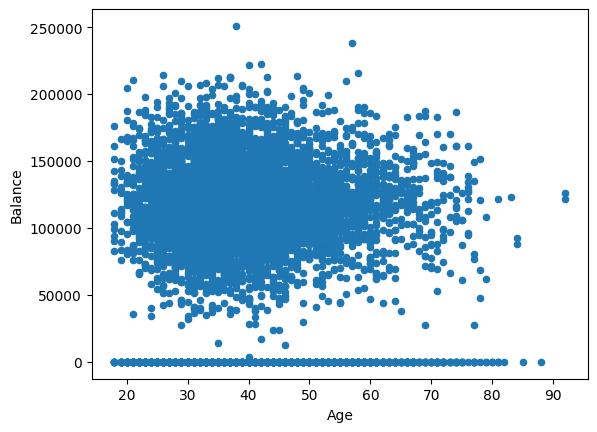

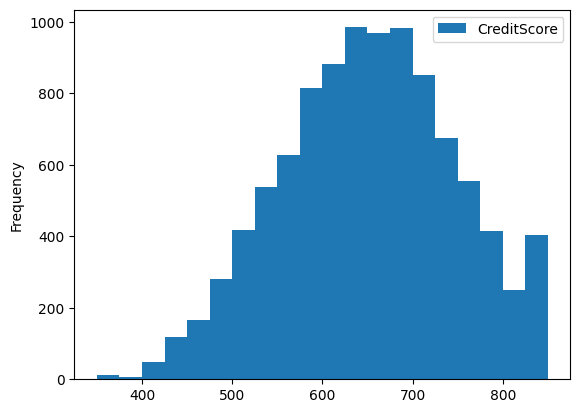

In [54]:
query = "create some graph accordingly to your understanding for me so the i can analyze my data better"
agent_executer.invoke(query)



> Entering new AgentExecutor chain...


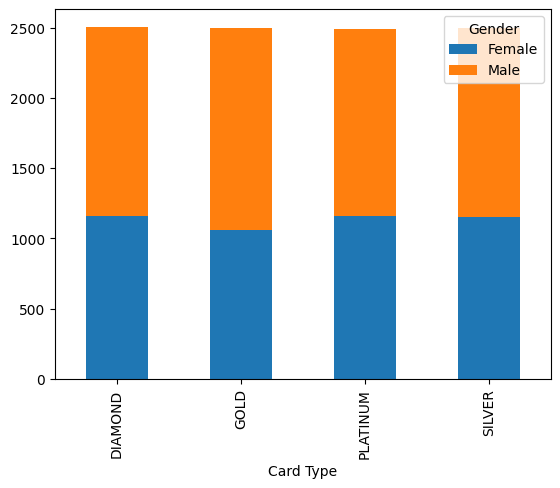

Thought: We need to group the data by Card Type and Gender and then plot the counts of each group.
Action: python_repl_ast
Action Input:
```
import matplotlib.pyplot as plt
df.groupby(['Card Type', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.show()
```The plot shows the counts of each Card Type and Gender combination.
Final Answer: The plot shows the counts of each Card Type and Gender combination.

> Finished chain.


{'input': 'give a plot to analyze different cardtype and gender',
 'output': 'The plot shows the counts of each Card Type and Gender combination.'}

In [57]:
query = "give a plot to analyze different cardtype and gender"
agent_executer.invoke(query)